# Transfer Learning of ResNet50

## Imports

In [4]:
#import sys
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from keras import regularizers

# from sklearn.datasets import load_files
# from keras.preprocessing import image
# from tqdm import tqdm # progress bar

np.random.seed(42) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(42)

## Load Data

In [5]:
val_data_dir = "Data/val/"
batch_size = 32                   
img_height = 224 #150
img_width = 224 #150

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    labels= "inferred",
    #label_mode="int",
    label_mode = "categorical",
    #color_mode = One of "grayscale", "rgb", "rgba". Defaults to "rgb". Whether the images will be converted to have 1, 3, or 4 channels.,
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 8538 files belonging to 4 classes.


2025-03-24 17:40:58.574552: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
test_data_dir = "Data/test/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    labels= "inferred",
    #label_mode="int",
    label_mode = "categorical",
    #color_mode = One of "grayscale", "rgb", "rgba". Defaults to "rgb". Whether the images will be converted to have 1, 3, or 4 channels., 
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5259 files belonging to 4 classes.


In [6]:
# Combine Test and Validation to make more cohesive validation set 
# combined_ds = val_ds.concatenate(test_ds)
# combined_ds = combined_ds.shuffle(buffer_size=1000, seed=42)

## Model 1 - ResNet50 no additional learning

Requires the datasets to have 

label_mode="int" 

and model to have 

loss=tf.keras.losses.SparseCategoricalCrossentropy()

### Build Model 

In [7]:
model = keras.Sequential()
resnet_model = keras.applications.ResNet50(
         include_top=False,
         weights="imagenet",
         input_tensor=None,
         input_shape=(img_height, img_width, 3), #Adjust if necessary 
         pooling="max",
         classes=4,
         classifier_activation="softmax"
)
# Don't change what ResNet50 has already learned
for layer in model.layers: 
    layer.trainable = False
    
model.add(resnet_model) 
#model.add(keras.layers.Flatten()) 
#model.add(keras.layers.Dense(64, activation='relu')) 
#model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [8]:
model.compile(optimizer='adam',
              #loss=tf.keras.losses.CategoricalCrossentropy(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              #metrics=['accuracy', 'AUC'])
              metrics=['accuracy'])

In [9]:
# This is really long
#model.summary()

In [10]:
epochs = 20
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/20


2025-03-16 16:55:58.139362: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90501
W0000 00:00:1742158558.488086    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.517221    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.517842    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.538238    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.539403    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.587706    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.590744    3310 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742158558.591764    3310 gpu_

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/__main__.py", line 5, in <module>

  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 739, in start

  File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 215, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_3151/2235884026.py", line 2, in <module>

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1804, in fit

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1148, in train_step

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1206, in compute_loss

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,2048] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_24722]

### Visualize Training Results

In [ ]:
# loss, acc, AUC = model.evaluate(val_ds)
# print(f"Validation accuracy: {acc:.2f}")
# print(f"Validation loss: {loss:.2f}")
# print(f"Validation AUC: {AUC:.2f}")

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [ ]:
model.evaluate(test_ds)

### Predict on New Data

In [ ]:
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
# This is directly from Tutorial before Codethon I. Just a template to build off of. 
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
# img = tf.keras.utils.load_img(
#
#)
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
# predictions = model.predict(img_array) 
# score = tf.nn.softmax(predictions[0])
# print("This image most likely belongs to {} with a {:.2f} percent confidence." .format(class_names[np.argmax(score)], 100 * np.max(score)))

In [ ]:
#predictions = model.predict(test_ds)

In [ ]:
#predictions[:10]

In [ ]:
#Confusion Matrix

In [ ]:
#from sklearn.metrics import confusion_matrix, classification_report
#classification_report(truth, prediction)   #should give precision, recall, f1-score, support

## Model 2

### Build Model

In [22]:
model = keras.Sequential()
resnet_model = keras.applications.ResNet50(
         include_top=False,
         weights="imagenet",
         input_tensor=None,
         input_shape=(img_height, img_width, 3), #Adjust if necessary 
         pooling="max",
         #classes=4,
         #classifier_activation="softmax"
)
# Don't change what ResNet50 has already learned
for layer in model.layers: 
    layer.trainable = False
    
model.add(resnet_model) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [23]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])                                    #keras.metrics.F1Score() - fails by data type

epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15
1030/1030 [==============================] - 117s 87ms/step - loss: 0.4365 - accuracy: 0.8603 - auc: 0.9715 - f1_score: 0.8556 - recall_1: 0.8418 - precision_1: 0.8769 - val_loss: 0.4325 - val_accuracy: 0.8558 - val_auc: 0.9675 - val_f1_score: 0.8576 - val_recall_1: 0.8425 - val_precision_1: 0.8680
Epoch 2/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.2410 - accuracy: 0.9100 - auc: 0.9886 - f1_score: 0.9167 - recall_1: 0.9060 - precision_1: 0.9145 - val_loss: 0.5984 - val_accuracy: 0.7873 - val_auc: 0.9398 - val_f1_score: 0.7158 - val_recall_1: 0.7635 - val_precision_1: 0.8077
Epoch 3/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.2244 - accuracy: 0.9184 - auc: 0.9898 - f1_score: 0.9262 - recall_1: 0.9149 - precision_1: 0.9218 - val_loss: 1.0572 - val_accuracy: 0.6311 - val_auc: 0.8741 - val_f1_score: 0.5670 - val_recall_1: 0.6209 - val_precision_1: 0.6382
Epoch 4/15
1030/1030 [==============================] - 89s 86ms/step

### Visualize Training Results

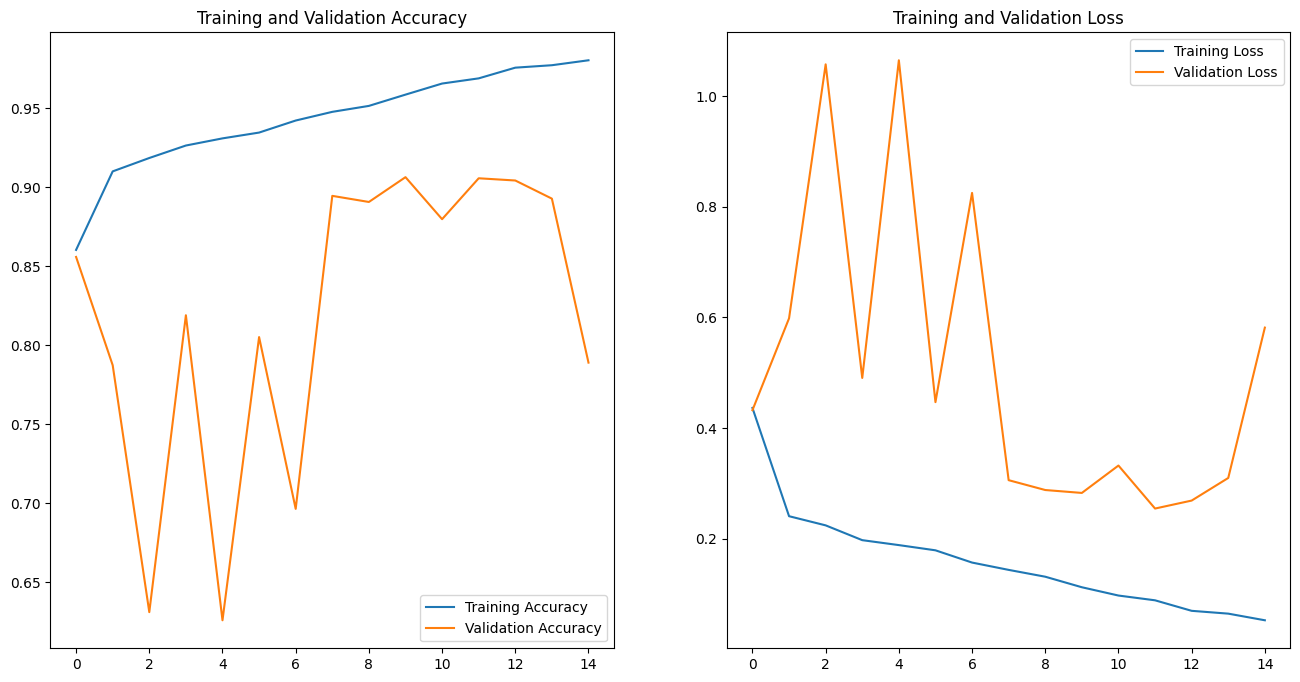

In [24]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [26]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 6s 36ms/step - loss: 0.6233 - accuracy: 0.7895 - auc: 0.9475 - f1_score: 0.7496 - recall_1: 0.7830 - precision_1: 0.7971
Test accuracy: 0.7895
Test loss: 0.6233
Test AUC: 0.9475
Test recall: 0.7830
Test precision: 0.7971
Test f1 score [0.79999995 0.81697387 0.78497523 0.59657705]


### Predict on New Data

In [27]:
# import PIL
# import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))


1/1 [==============================] - 0s 20ms/step
This image most likely belongs to PNEUMONIA with a 44.54 percent confidence.
This image most likely belongs to PNEUMONIA with a 45.89 percent confidence.
This image most likely belongs to PNEUMONIA with a 39.52 percent confidence.
This image most likely belongs to PNEUMONIA with a 35.05 percent confidence.


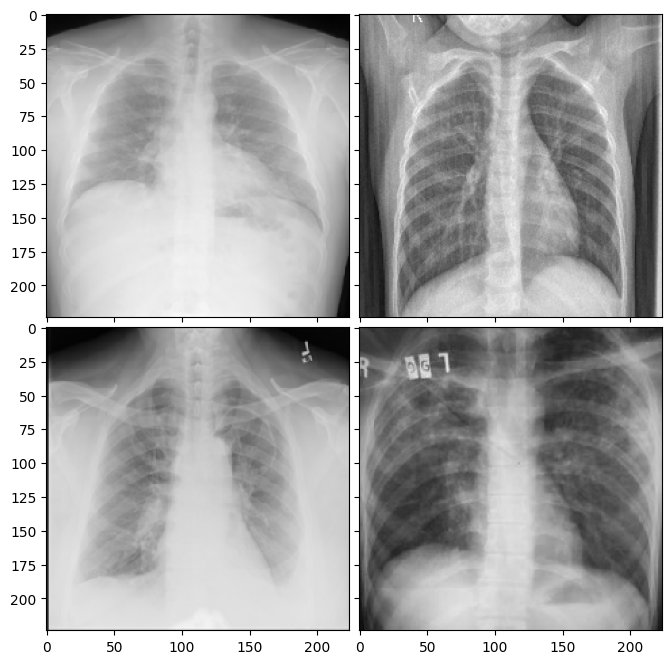

In [28]:
# Need to add labels as title for each image
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [29]:
# from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

165/165 [==============================] - 6s 28ms/step
Confusion Matrix:
 [[504 421 966  40]
 [320 246 624  26]
 [501 393 886  46]
 [ 74  57 144  11]]


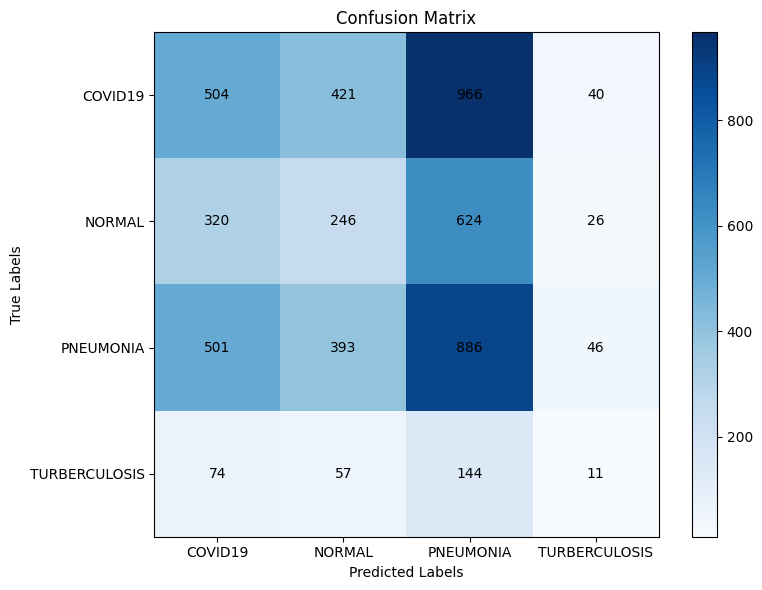

In [30]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Trying Keras Tuning

Taking out option of tanh, as that has never been a top performing option.

In [5]:
import keras
import keras_tuner as kt

#Build function to test different hyperparameters
def build_model(hp):
    tuned_model = keras.Sequential() 
    ResNet50_model = keras.applications.ResNet50(
                    include_top=False,
                    weights="imagenet",
                    input_tensor=None, 
                    input_shape=(img_height, img_width, 3), 
                    pooling="max")#,
                    #classes=num_classes, 
                    #classifier_activation="softmax"

    # Don't change what ResNet50 has already learned
    for layer in ResNet50_model.layers: 
        layer.trainable = False
    tuned_model.add(ResNet50_model) 
    tuned_model.add(keras.layers.Flatten())
        
    #hp_activation = hp.Choice('activation', values =['relu','tanh'])
    hp_layer_1 = hp.Int('layer_1',min_value = 32, max_value = 512, step = 32) 
    hp_layer_2 = hp.Int('layer_2',min_value = 32, max_value = 512, step = 32) 
    hp_learning_rate = hp.Choice('learning_rate', values = [0.0001, 0.001, 0.01])

    tuned_model.add(keras.layers.Dense(units = hp_layer_1, activation = 'relu')) 
    tuned_model.add(keras.layers.Dense(units = hp_layer_2, activation = 'relu')) 
    tuned_model.add(keras.layers.Dense(4, activation='softmax'))
    tuned_model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate),
                        #loss='sparse_categorical_crossentropy',
                        loss='categorical_crossentropy',
                        metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()]) 
    return tuned_model
build_model(kt.HyperParameters())

<Sequential name=sequential, built=False>

In [6]:
#Define type of search and designate location for files to save
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective="val_accuracy",
                        max_trials=10,
                        executions_per_trial=2,
                        overwrite=True,
                        directory="ResNet50 Hyperparameter Tuning",
                        project_name="Tuning Results")  

In [7]:
#Displays the hyperparameters we are exploring
tuner.search_space_summary()

Search space summary
Default search space size: 3
layer_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
layer_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.001, 0.01], 'ordered': True}


In [8]:
#Utilizing stop early to save computation time
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3) 
# Execute the search
tuner.search(train_ds,validation_data= val_ds, epochs = 15, callbacks = [stop_early])

Trial 10 Complete [00h 19m 14s]
val_accuracy: 0.9439564049243927

Best val_accuracy So Far: 0.9610564410686493
Total elapsed time: 04h 57m 13s


In [9]:
#View best model result
models = tuner.get_best_models(num_models=2) 
best_model = models[0]
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │       458,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,054,020 (91.76 MB)

 Trainable params: 466,308 (1.78 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# Displays results of all trials in order of best to worst performance
tuner.results_summary()

Results summary
Results in ResNet50 Hyperparameter Tuning/Tuning Results
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
layer_1: 224
layer_2: 32
learning_rate: 0.0001
Score: 0.959182471036911

Trial 09 summary
Hyperparameters:
layer_1: 224
layer_2: 416
learning_rate: 0.0001
Score: 0.95689857006073

Trial 01 summary
Hyperparameters:
layer_1: 256
layer_2: 352
learning_rate: 0.0001
Score: 0.9557859003543854

Trial 07 summary
Hyperparameters:
layer_1: 384
layer_2: 480
learning_rate: 0.0001
Score: 0.9540876150131226

Trial 02 summary
Hyperparameters:
layer_1: 192
layer_2: 64
learning_rate: 0.0001
Score: 0.9504567682743073

Trial 04 summary
Hyperparameters:
layer_1: 480
layer_2: 320
learning_rate: 0.0001
Score: 0.9331225156784058

Trial 08 summary
Hyperparameters:
layer_1: 384
layer_2: 64
learning_rate: 0.001
Score: 0.9219957888126373

Trial 03 summary
Hyperparameters:
layer_1: 32
layer_2: 32
learning_rate: 0.001
Score: 0.90612557530

## Model 3 - Good Hyperparameter Result - Best so Far!
Trial 02 summary \
Hyperparameters: \
activation: relu\
layer_1: 128\
layer_2: 416\
learning_rate: 0.001\
Score: 0.9345279932022095

### Build Model

For initial dataset the best trial was for 224, 512, relu, lr = 0.01

In [31]:
model = keras.Sequential()
resnet_model = keras.applications.ResNet50(
         include_top=False,
         weights="imagenet",
         input_tensor=None,
         input_shape=(img_height, img_width, 3), #Adjust if necessary 
         pooling="max",
         #classes=4,
         #classifier_activation="softmax"
)
# Don't change what ResNet50 has already learned
for layer in model.layers: 
    layer.trainable = False
    
model.add(resnet_model) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(416, activation='relu')) 
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [32]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15
1030/1030 [==============================] - 117s 87ms/step - loss: 0.4683 - accuracy: 0.8427 - auc: 0.9641 - f1_score: 0.8349 - recall_2: 0.8242 - precision_2: 0.8600 - val_loss: 1.9469 - val_accuracy: 0.5497 - val_auc: 0.7996 - val_f1_score: 0.4594 - val_recall_2: 0.5418 - val_precision_2: 0.5537
Epoch 2/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.3043 - accuracy: 0.8927 - auc: 0.9819 - f1_score: 0.8943 - recall_2: 0.8848 - precision_2: 0.9002 - val_loss: 0.9672 - val_accuracy: 0.5998 - val_auc: 0.8416 - val_f1_score: 0.5571 - val_recall_2: 0.5060 - val_precision_2: 0.6950
Epoch 3/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.2539 - accuracy: 0.9098 - auc: 0.9870 - f1_score: 0.9156 - recall_2: 0.9047 - precision_2: 0.9149 - val_loss: 0.8362 - val_accuracy: 0.6346 - val_auc: 0.8863 - val_f1_score: 0.6157 - val_recall_2: 0.6025 - val_precision_2: 0.6599
Epoch 4/15
1030/1030 [==============================] - 89s 86ms/step

### Visualize Training Results

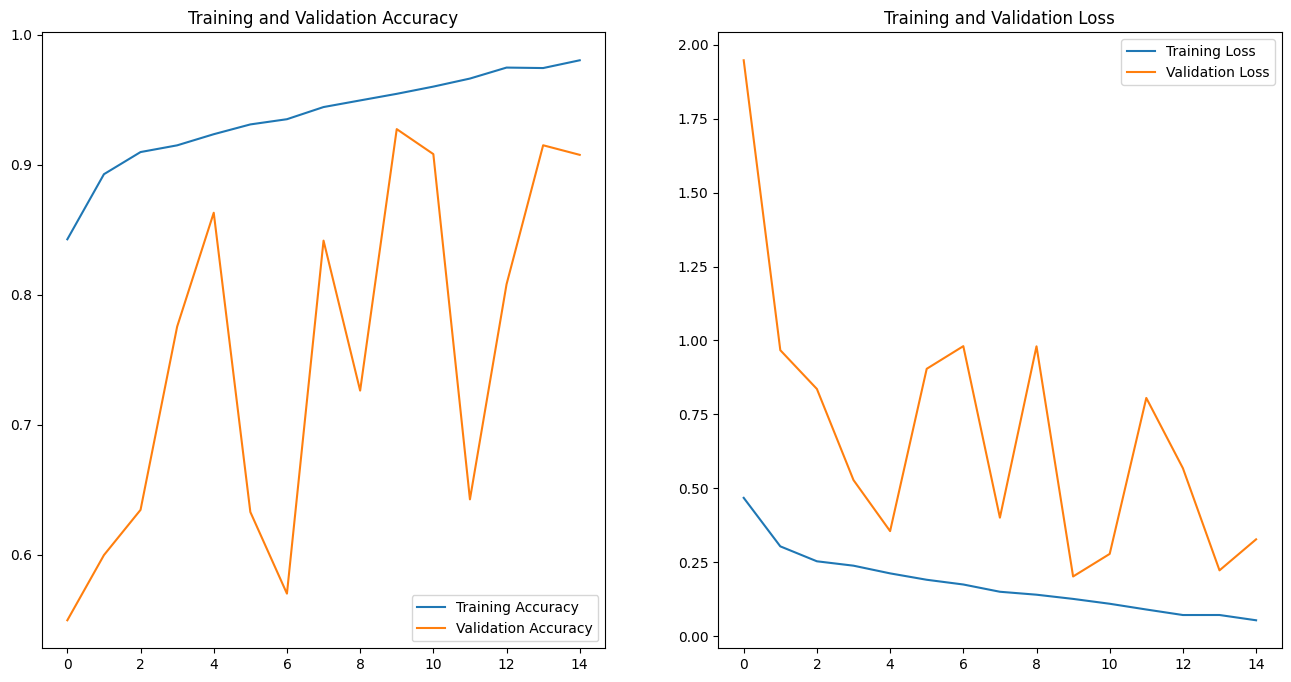

In [33]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [34]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 5s 29ms/step - loss: 0.3327 - accuracy: 0.9038 - auc: 0.9818 - f1_score: 0.9104 - recall_2: 0.9009 - precision_2: 0.9073
Test accuracy: 0.9038
Test loss: 0.3327
Test AUC: 0.9818
Test recall: 0.9009
Test precision: 0.9073
Test f1 score [0.9200957  0.9147659  0.86812174 0.93856657]


### Predict on New Data

In [35]:
import PIL
import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))


1/1 [==============================] - 0s 22ms/step
This image most likely belongs to COVID19 with a 47.54 percent confidence.
This image most likely belongs to NORMAL with a 47.54 percent confidence.
This image most likely belongs to PNEUMONIA with a 40.78 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


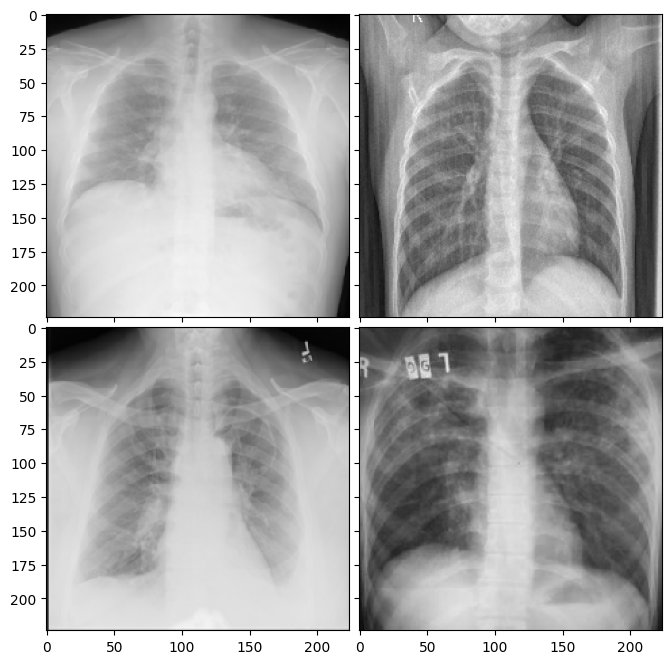

In [36]:
# Need to add labels as title for each image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

2025-03-21 10:20:35.317363: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


165/165 [==============================] - 6s 28ms/step
Confusion Matrix:
 [[823 455 542 111]
 [505 320 324  67]
 [790 442 484 110]
 [131  66  77  12]]


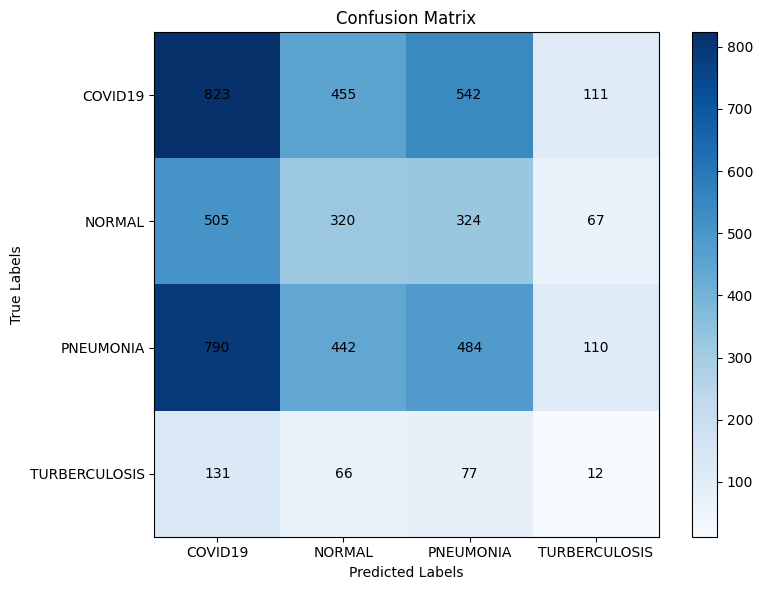

In [38]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Model 4 - Good Hyperparameter Tuning Result
Trial 05 summary\
Hyperparameters:\
layer_1: 224\
layer_2: 32\
learning_rate: 0.0001\
Score: 0.959182471036911

### Build Model

In [39]:
model = keras.Sequential()
resnet_model = keras.applications.ResNet50(
         include_top=False,
         weights="imagenet",
         input_tensor=None,
         input_shape=(img_height, img_width, 3), #Adjust if necessary 
         pooling="max",
         #classes=4,
         #classifier_activation="softmax"
)
# Don't change what ResNet50 has already learned
for layer in model.layers: 
    layer.trainable = False
    
model.add(resnet_model) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(224, activation='relu')) 
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [40]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15
1030/1030 [==============================] - 118s 88ms/step - loss: 0.5609 - accuracy: 0.8308 - auc: 0.9588 - f1_score: 0.8212 - recall_3: 0.8136 - precision_3: 0.8473 - val_loss: 1.2508 - val_accuracy: 0.6103 - val_auc: 0.8476 - val_f1_score: 0.6376 - val_recall_3: 0.5844 - val_precision_3: 0.6246
Epoch 2/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.2566 - accuracy: 0.9053 - auc: 0.9870 - f1_score: 0.9109 - recall_3: 0.9009 - precision_3: 0.9094 - val_loss: 1.4530 - val_accuracy: 0.4833 - val_auc: 0.8238 - val_f1_score: 0.3666 - val_recall_3: 0.4766 - val_precision_3: 0.4885
Epoch 3/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.2159 - accuracy: 0.9195 - auc: 0.9905 - f1_score: 0.9275 - recall_3: 0.9166 - precision_3: 0.9225 - val_loss: 1.4285 - val_accuracy: 0.5105 - val_auc: 0.7840 - val_f1_score: 0.3800 - val_recall_3: 0.4973 - val_precision_3: 0.5612
Epoch 4/15
1030/1030 [==============================] - 89s 86ms/step

### Visualize Training Results

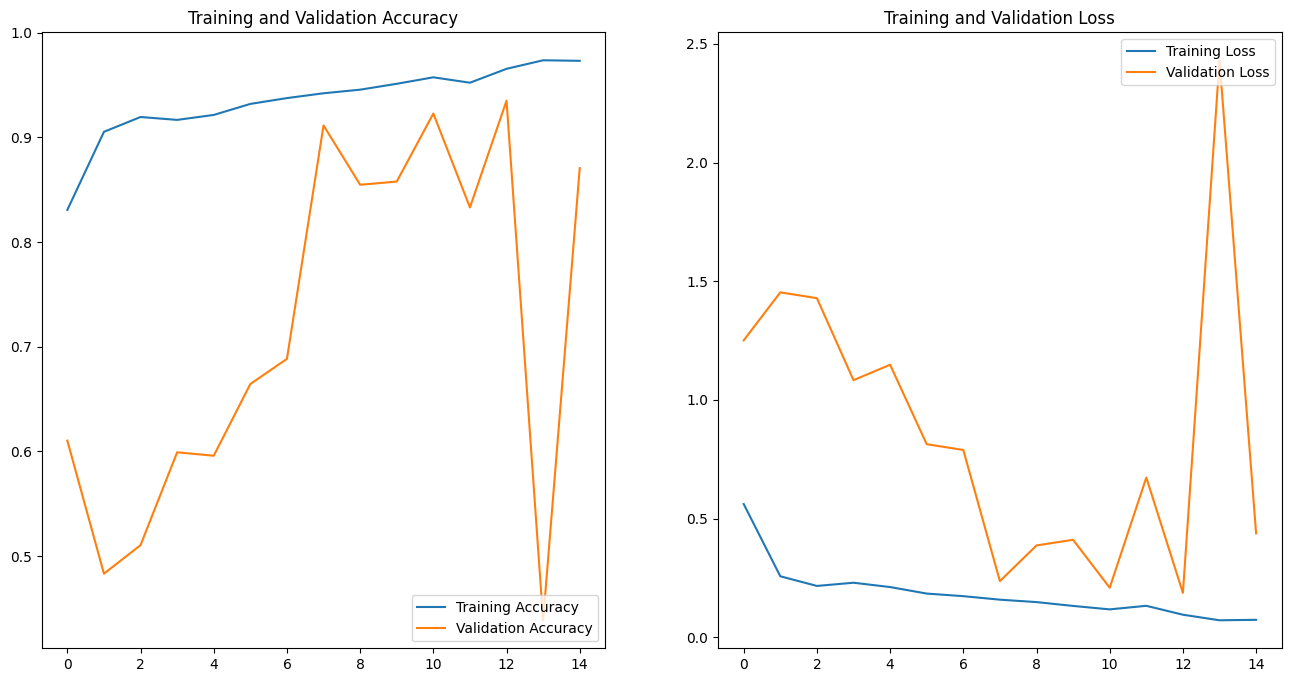

In [41]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [42]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 48s 276ms/step - loss: 0.4935 - accuracy: 0.8597 - auc: 0.9648 - f1_score: 0.8709 - recall_3: 0.8557 - precision_3: 0.8657
Test accuracy: 0.8597
Test loss: 0.4935
Test AUC: 0.9648
Test recall: 0.8557
Test precision: 0.8657
Test f1 score [0.85689205 0.860788   0.85428935 0.9114877 ]


### Predict on New Data

In [43]:
import PIL
import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))


1/1 [==============================] - 0s 19ms/step
This image most likely belongs to COVID19 with a 46.74 percent confidence.
This image most likely belongs to NORMAL with a 47.37 percent confidence.
This image most likely belongs to PNEUMONIA with a 46.58 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.53 percent confidence.


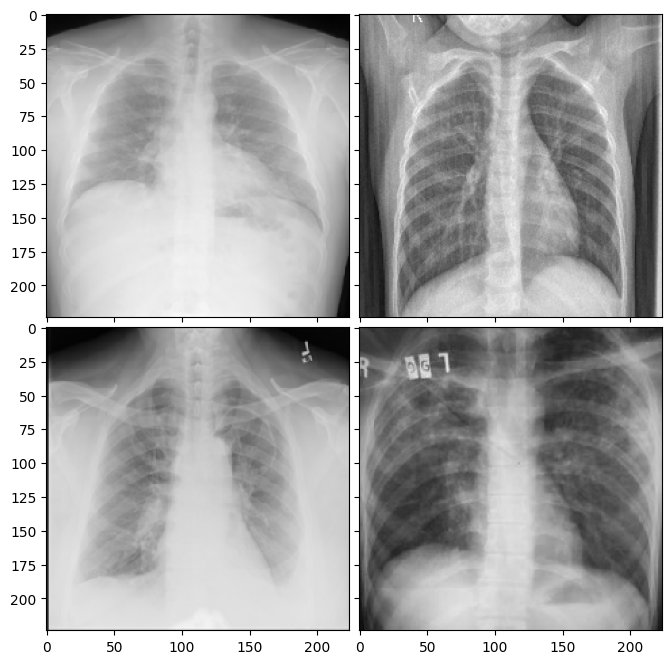

In [44]:
# Need to add labels as title for each image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [45]:
from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

165/165 [==============================] - 6s 29ms/step
Confusion Matrix:
 [[563 511 751 106]
 [322 331 517  46]
 [517 524 704  81]
 [ 84  83 107  12]]


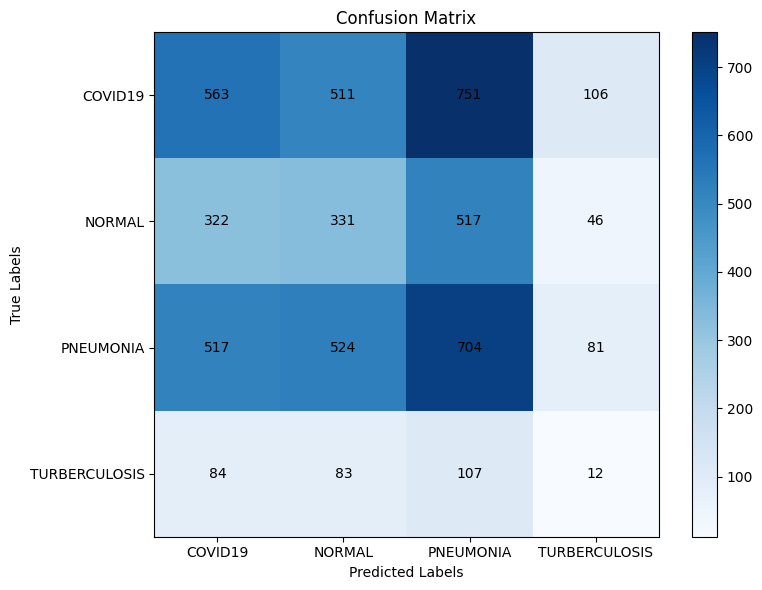

In [46]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Model 5 - Good Hyperparameter Result

### Build Model

In [5]:
model = keras.Sequential()
resnet_model = keras.applications.ResNet50(
         include_top=False,
         weights="imagenet",
         input_tensor=None,
         input_shape=(img_height, img_width, 3), #Adjust if necessary 
         pooling="max",
         #classes=4,
         #classifier_activation="softmax"
)
# Don't change what ResNet50 has already learned
for layer in model.layers: 
    layer.trainable = False
    
model.add(resnet_model) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(448, activation='relu')) 
model.add(keras.layers.Dense(448, activation='relu')) 
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [6]:
optimizer=keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15


I0000 00:00:1742561353.263481  929221 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1742561356.273858  929224 service.cc:148] XLA service 0x7fc3e416f110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742561356.273903  929224 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2025-03-21 08:49:16.284101: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742561356.516735  929224 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1030/1030 [==============================] - 439s 390ms/step - loss: 0.6506 - accuracy: 0.8228 - auc: 0.9576 - f1_score: 0.8116 - recall: 0.7978 - precision: 0.8465 - val_loss: 2.6215 - val_accuracy: 0.4938 - val_auc: 0.7359 - val_f1_score: 0.3705 - val_recall: 0.4907 - val_precision: 0.4948
Epoch 2/15
1030/1030 [==============================] - 90s 87ms/step - loss: 0.2884 - accuracy: 0.8957 - auc: 0.9839 - f1_score: 0.8998 - recall: 0.8897 - precision: 0.9017 - val_loss: 1.2044 - val_accuracy: 0.5285 - val_auc: 0.8077 - val_f1_score: 0.4051 - val_recall: 0.5149 - val_precision: 0.5722
Epoch 3/15
1030/1030 [==============================] - 90s 87ms/step - loss: 0.2713 - accuracy: 0.9025 - auc: 0.9855 - f1_score: 0.9080 - recall: 0.8968 - precision: 0.9077 - val_loss: 0.5445 - val_accuracy: 0.7742 - val_auc: 0.9500 - val_f1_score: 0.7627 - val_recall: 0.7597 - val_precision: 0.7909
Epoch 4/15
1030/1030 [==============================] - 89s 86ms/step - loss: 0.2279 - accuracy: 0.9170

### Visualize Training Results

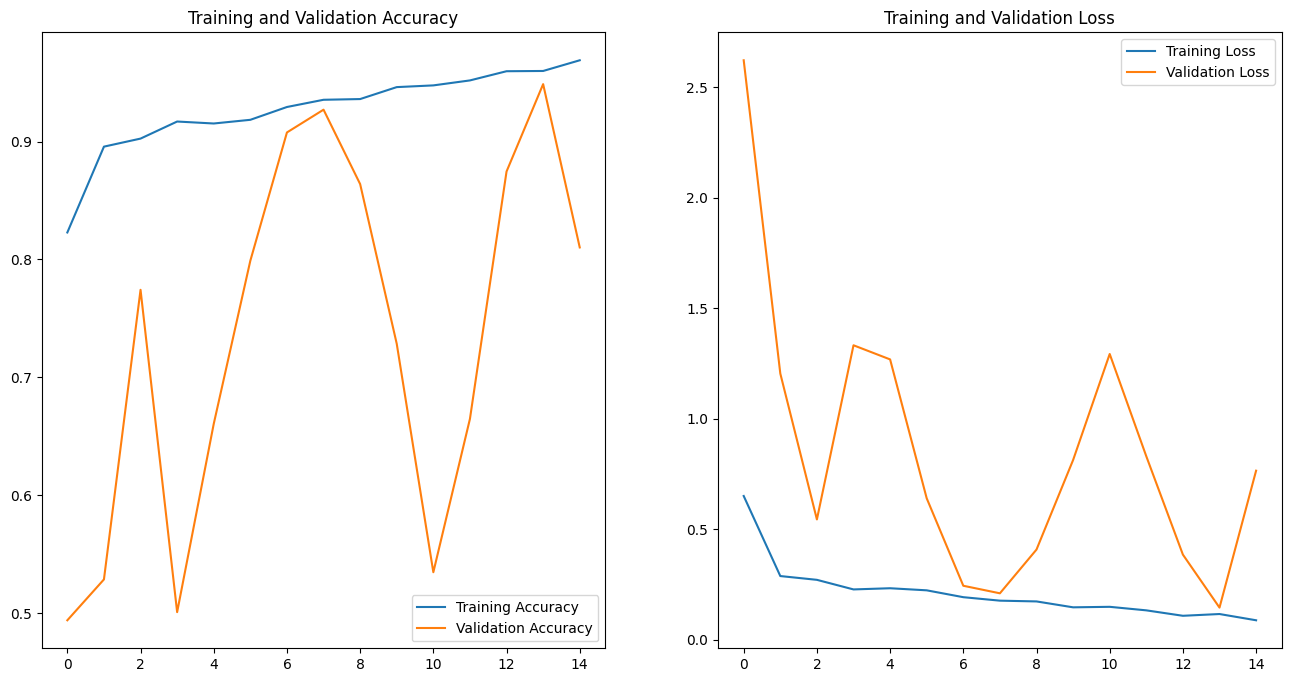

In [7]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [8]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 61s 351ms/step - loss: 0.7181 - accuracy: 0.8180 - auc: 0.9462 - f1_score: 0.7788 - recall: 0.8074 - precision: 0.8285
Test accuracy: 0.8180
Test loss: 0.7181
Test AUC: 0.9462
Test recall: 0.8074
Test precision: 0.8285
Test f1 score [0.868725   0.8494954  0.78811616 0.6087888 ]


### Predict on New Data

In [10]:
import PIL
import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))


1/1 [==============================] - 0s 24ms/step
This image most likely belongs to COVID19 with a 45.99 percent confidence.
This image most likely belongs to NORMAL with a 36.00 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 41.20 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


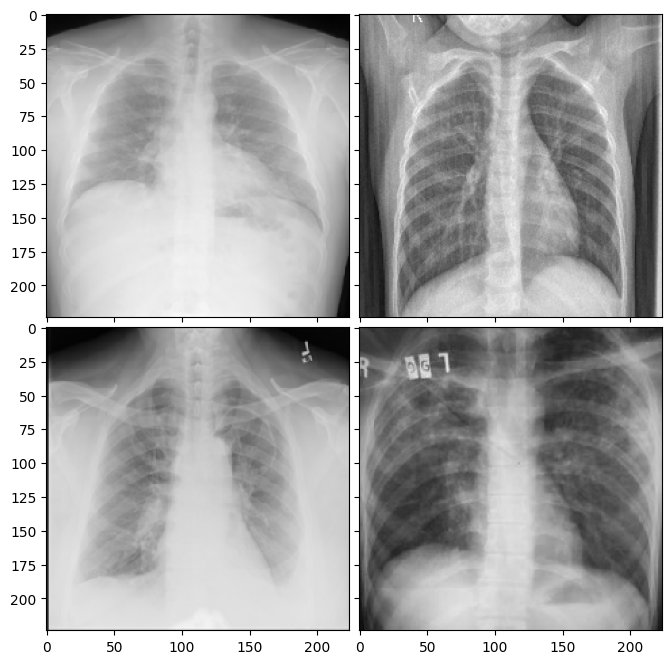

In [11]:
# Need to add labels as title for each image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [33]:
first_COVID_img.size

(256, 256)

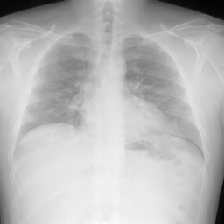

In [37]:
first_COVID_img

In [16]:
#from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

2025-03-21 09:21:12.882470: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


165/165 [==============================] - 5s 28ms/step
Confusion Matrix:
 [[857 375 447 252]
 [532 243 301 140]
 [801 379 420 226]
 [122  66  69  29]]


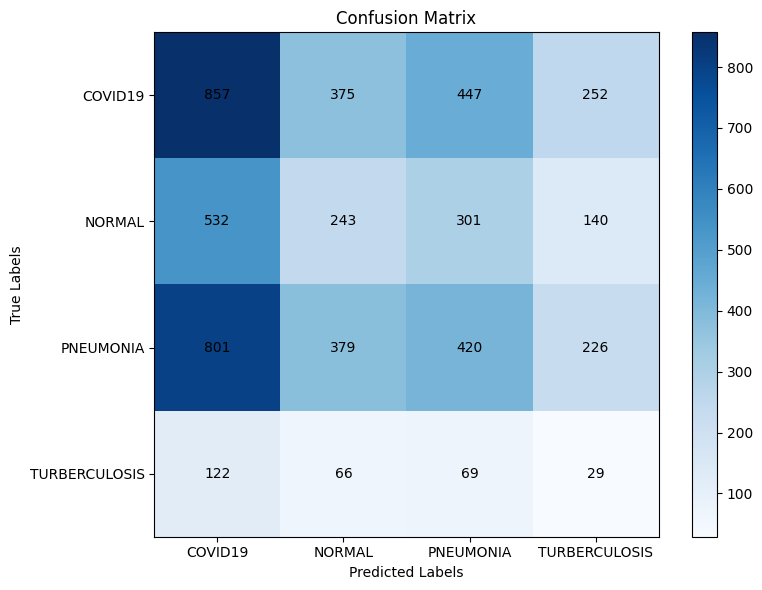

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()